## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.

## Task
We want to use polynomial regression to model the relationship between the independent variable \( X \) and the dependent variable \( y \).

## Dataset
We will create a synthetic dataset using the given equation. We will use this dataset to train polynomial regression models with varying degrees of polynomials.
We will also create different test sets to evaluate the models' performance.

## Objective
We want to find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \). We will use the mean squared error (MSE) to evaluate the models' performance on different test sets.

## Plan
1. Create a synthetic dataset using the given equation.
2. Split the dataset into training and testing sets.
3. Train polynomial regression models with varying degrees of polynomials.
4. Evaluate the models' performance on different test sets using the mean squared error (MSE).
5. Find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \).



# Implementation (100 Points)
We will start by creating a synthetic dataset using the given equation.

## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-4 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5.

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^5 + X^4 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [56]:
import numpy as np

def generate_dataset(range_start, range_end, num_samples, noise_std=5.0):
    # TODO: Generate the dataset with

    # np.random.seed(0)
    X = np.random.uniform(range_start, range_end, num_samples)[:, np.newaxis]
    noise = np.random.normal(0, 5, X.shape)
    y =  0.1*X**5 + X**4 - 2*X**3 + 7*X**2 - 9*X + 3 + noise
    return X, y

In [64]:
X, y = generate_dataset(-4, -1, 1000)

## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 5 to 7.**

In [65]:
from sklearn.model_selection import train_test_split

degree = 5

# TODO: Split dataset into training and in-range testing
X_train, X_test_in_range, y_train, y_test_in_range = train_test_split(X, y, test_size=0.2, random_state=0)

# TODO: Generate out-of-range testing set
# 200 samples for out-of-range testing is generated again as it should have
# different range of data (5 to 7).
# We use the function used to generate the data so the the noise will be
# introduced to this test set too.
X_test_out_of_range, y_test_out_of_range = generate_dataset(5, 7, 200)

X_train.shape, X_test_in_range.shape, y_train.shape, y_test_in_range.shape, X_test_out_of_range.shape, y_test_out_of_range.shape

((800, 1), (200, 1), (800, 1), (200, 1), (200, 1), (200, 1))

## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 7. You can use the `preprocessing`, `linear_model`, and `pipeline` classes of the `sklearn` library.

In [66]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


def train_polynomial_regression(X, y, degree):
    # TODO: train the model based on the given degree
    model =  Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
        ('linear_regression', LinearRegression())
    ])

    model.fit(X, y)
    return model

In [67]:
models = {}
# TODO: Put the models with different degrees in the models dict
for d in range(2, degree + 3):
    models[d] = train_polynomial_regression(X_train, y_train, d)

## 4. Model Evaluation (15 Points)
Evaluate the models on both test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.


In [68]:
from sklearn.metrics import mean_squared_error

def evaluate_models(models, X_test, y_test):
    losses = {}
    # TODO: Calculate each model's loss on the sets.
    for degree, model in models.items():
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        losses[degree] = mse
    return losses

In [69]:
losses_train = evaluate_models(models, X_train, y_train)
losses_in_range = evaluate_models(models, X_test_in_range, y_test_in_range)
losses_out_of_range = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)

## 5. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and two test sets based on the model degree varying from 3 to 7. Train the model a few times to get a sense of how the results can change.


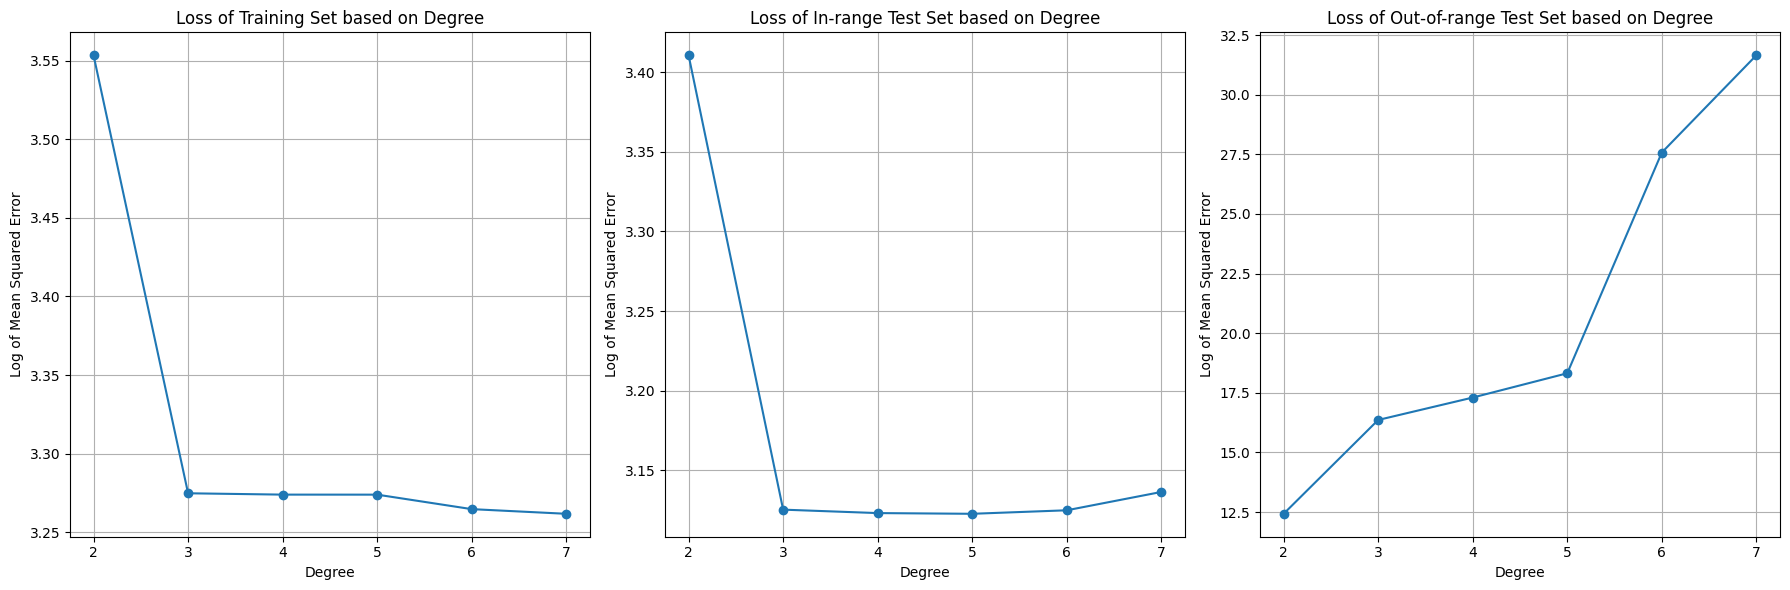

In [72]:
from matplotlib import pyplot as plt

# TODO: Plot the logarithm of loss based on the model degrees from 3 to 7

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# TODO: Plot logarithm of losses of training set
degrees = sorted(losses_train.keys())
train_losses_log = [np.log(losses_train[degree]) for degree in degrees]
ax1.plot(degrees, train_losses_log, label='Training Set', marker='o')
ax1.set_title('Loss of Training Set based on Degree')
ax1.set_xlabel('Degree')
ax1.set_ylabel('Log of Mean Squared Error')
ax1.grid(True)

# TODO: Plot logarithm of losses of in-range test set
in_range_losses_log = [np.log(losses_in_range[degree]) for degree in degrees]
ax2.plot(degrees, in_range_losses_log, label='In-range Test Set', marker='o')
ax2.set_title('Loss of In-range Test Set based on Degree')
ax2.set_xlabel('Degree')
ax2.set_ylabel('Log of Mean Squared Error')
ax2.grid(True)

# TODO: Plot logarithm of losses of out-of-range test set
out_of_range_losses_log = [np.log(losses_out_of_range[degree]) for degree in degrees]
ax3.plot(degrees, out_of_range_losses_log, label='Out-of-range Test Set', marker='o')
ax3.set_title('Loss of Out-of-range Test Set based on Degree')
ax3.set_xlabel('Degree')
ax3.set_ylabel('Log of Mean Squared Error')
ax3.grid(True)

plt.tight_layout()
plt.show()

## Conclusion (10 Points)

Now print out the losses on each set here.

In [74]:
# TODO: print each model loss on the training and the two test sets
print("Training Set Losses:", losses_train)
print("In-range Test Set Losses:", losses_in_range)
print("Out-of-range Test Set Losses:", losses_out_of_range)

Training Set Losses: {2: 34.93247617909836, 3: 26.437693774374207, 4: 26.41525060162756, 5: 26.414736210769032, 6: 26.17244221784047, 7: 26.094985766213977}
In-range Test Set Losses: {2: 30.286924249100625, 3: 22.765927505896443, 4: 22.716763052408798, 5: 22.706601870296822, 6: 22.75668396825141, 7: 23.02024709637089}
Out-of-range Test Set Losses: {2: 248999.33188412007, 3: 12747005.754753971, 4: 32631545.782676846, 5: 90395955.46129075, 6: 948585492473.5903, 7: 56087818212161.76}


With comparing the loss of **training set and the in-range test set** and also **in-range test set and the out-of-range test set**, specially in higher degrees, what we can conclude about the bias - variance trade off?

**Answer:**

Expected to explain overfitiing on the training set and also the face that model has less generalization to unseen data.

Training Set Losses decrease slightly as the degree increases, which suggests that higher-degree polynomials are able to fit the training data better.

This is expected because higher-degree polynomials can capture more complex patterns (and noise) in the data.

In-range Test Set Losses are lowest for the 5th-degree polynomial, which makes sense given that the underlying true model from which the data was generated is a 5th-degree polynomial.

However, as the polynomial degree increases beyond 5, the test set losses start to increase slightly, indicating the beginning of overfitting, where the model is starting to fit the noise in the training data rather than the underlying relationship itself.

Out-of-range Test Set Losses explode exponentially as the degree of the polynomial increases. This is a clear sign of overfitting, the models are not only capturing the noise in the training set but also the complex polynomial features that do not generalize to the unseen data range (5 to 7).

The model with degree 2 has the lowest loss, which suggests underfitting.

Its too simple to capture the complexity of the underlying relationship even though it doesn't perform as poorly on unseen data.



Lower-degree polynomials (degree 2) are likely showing high bias and low variance, that means they are too simple to capture the true relationship (underfitting) but are more stable when generalizing to new unseen data.

Middle-degree polynomials (degree 5, which is the same degree as our true data model) likely represent a good balance between bias and variance, fitting the training data well and also generalizing well inside the range of the training data.

Higher-degree polynomials (degrees 6 and 7) are likely showing low bias and high variance, fitting the training data very closely (also learning thee noise) and performing very poorly on out-of-range data probably due to overfitting.


Overally we can say that the best model is degree 5 as it is the one that aligns with the true underlying data-generating process and fits the training data well and generalizes well to in-range test data too.

Higher-degree models overfit the training data, capturing noise instead of the underlying pattern, which reduces their generalization, especially with out-of-range data.

The exponential increase in the out-of-range test set losses for high-degree polynomials shows the effect of model simplicity for generalization. It demonstrates that a model that is too complex for the data-generating process will not perform well on data outside of the range it has seen during training.